#In this book, I create some regression models using statsmodels, and I analyzse some of the findings

In [1]:
import statsmodels.api as sm
import pandas as pd
from patsy import dmatrices
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols

In [2]:
#Opening and editing the file
gen_all = pd.ExcelFile("genall.xlsx")
genall = gen_all.parse("Sheet1", na_values = "")
genall["type2"] = genall["type2"].fillna(0)
genall["type2"] = genall["type2"].replace(0, "", regex = True)
genall["Types"] = genall[["type1", "type2"]].values.tolist()
genall["ability2"] = genall["ability2"].fillna(0)
genall["ability2"] = genall["ability2"].replace(0, "", regex = True)
genall["hability"] = genall["hability"].fillna(0)
genall["hability"] = genall["hability"].replace(0, "", regex = True)
genall["Abilities"] = genall[["ability1", "ability2", "hability"]].values.tolist()
genall = genall.rename(columns = {"def" : "defe"})


In [3]:
#Creating and analyzing the Attack Stat model
vari_att_typ = ['atk', 'Type:Bug', 'Type:Dark',
       'Type:Dragon', 'Type:Electric', 'Type:Fairy', 'Type:Fighting',
       'Type:Fire', 'Type:Flying', 'Type:Ghost', 'Type:Grass', 'Type:Ground',
       'Type:Ice', 'Type:Normal', 'Type:Poison', 'Type:Psychic', 'Type:Rock',
       'Type:Steel', 'Type:Water' ]
data_model1 = genall[vari_att_typ]
dm1 = data_model1.rename(columns = {'Type:Bug' :"bug", 'Type:Dark' : "dark",
       'Type:Dragon' : "dragon", 'Type:Electric' : "electric", 'Type:Fairy' : "fairy", 'Type:Fighting' : "fighting",
       'Type:Fire' : "fire", 'Type:Flying' : "flying", 'Type:Ghost' : "ghost", 'Type:Grass' : "grass", 'Type:Ground' : "ground",
       'Type:Ice' : "ice", 'Type:Normal' : "normal", 'Type:Poison' : "poison", 'Type:Psychic' : "psychic", 'Type:Rock' : "rock",
       'Type:Steel' : "steel", 'Type:Water' : "water" })
ym1, xm1 = dmatrices("atk ~ bug + dark + dragon + electric + fairy + fighting + fire + flying + ghost + grass + ground + ice + normal + poison + psychic + rock + steel + water", data = dm1, return_type = "dataframe") 
model_at = sm.OLS(ym1, xm1)
res_at = model_at.fit()
print(res_at.summary())

                            OLS Regression Results                            
Dep. Variable:                    atk   R-squared:                       0.152
Model:                            OLS   Adj. R-squared:                  0.135
Method:                 Least Squares   F-statistic:                     9.019
Date:                Tue, 20 Oct 2020   Prob (F-statistic):           5.60e-23
Time:                        16:37:49   Log-Likelihood:                -4369.5
No. Observations:                 926   AIC:                             8777.
Df Residuals:                     907   BIC:                             8869.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     70.7592      3.089     22.905      0.0

Looking at this regression, some of the findings are:
1- The R2 value is quite low, around 15%. Yet, the f-value of the tests passes the significance test, and there are multiple individual variables that are highly significant, and some that are not significant.
2- Looking at the individual variables, we see that those variables that are highly significant are those types who have relatively low, or high, coefficients. On the other hand, the variables that are not significant are those who have coefficient values around the midpoint.
Based on this, it might be worth it to look at the partial regression graphs of the 3 cases (high coefficient, low coefficient, and a midpoint coefficient)

,pokemon,atk
190,Ledyba,20
904,Snom,25
238,Shuckle,10
152,Pinsir,125
800,Golisopod,125
620,Escavalier,135


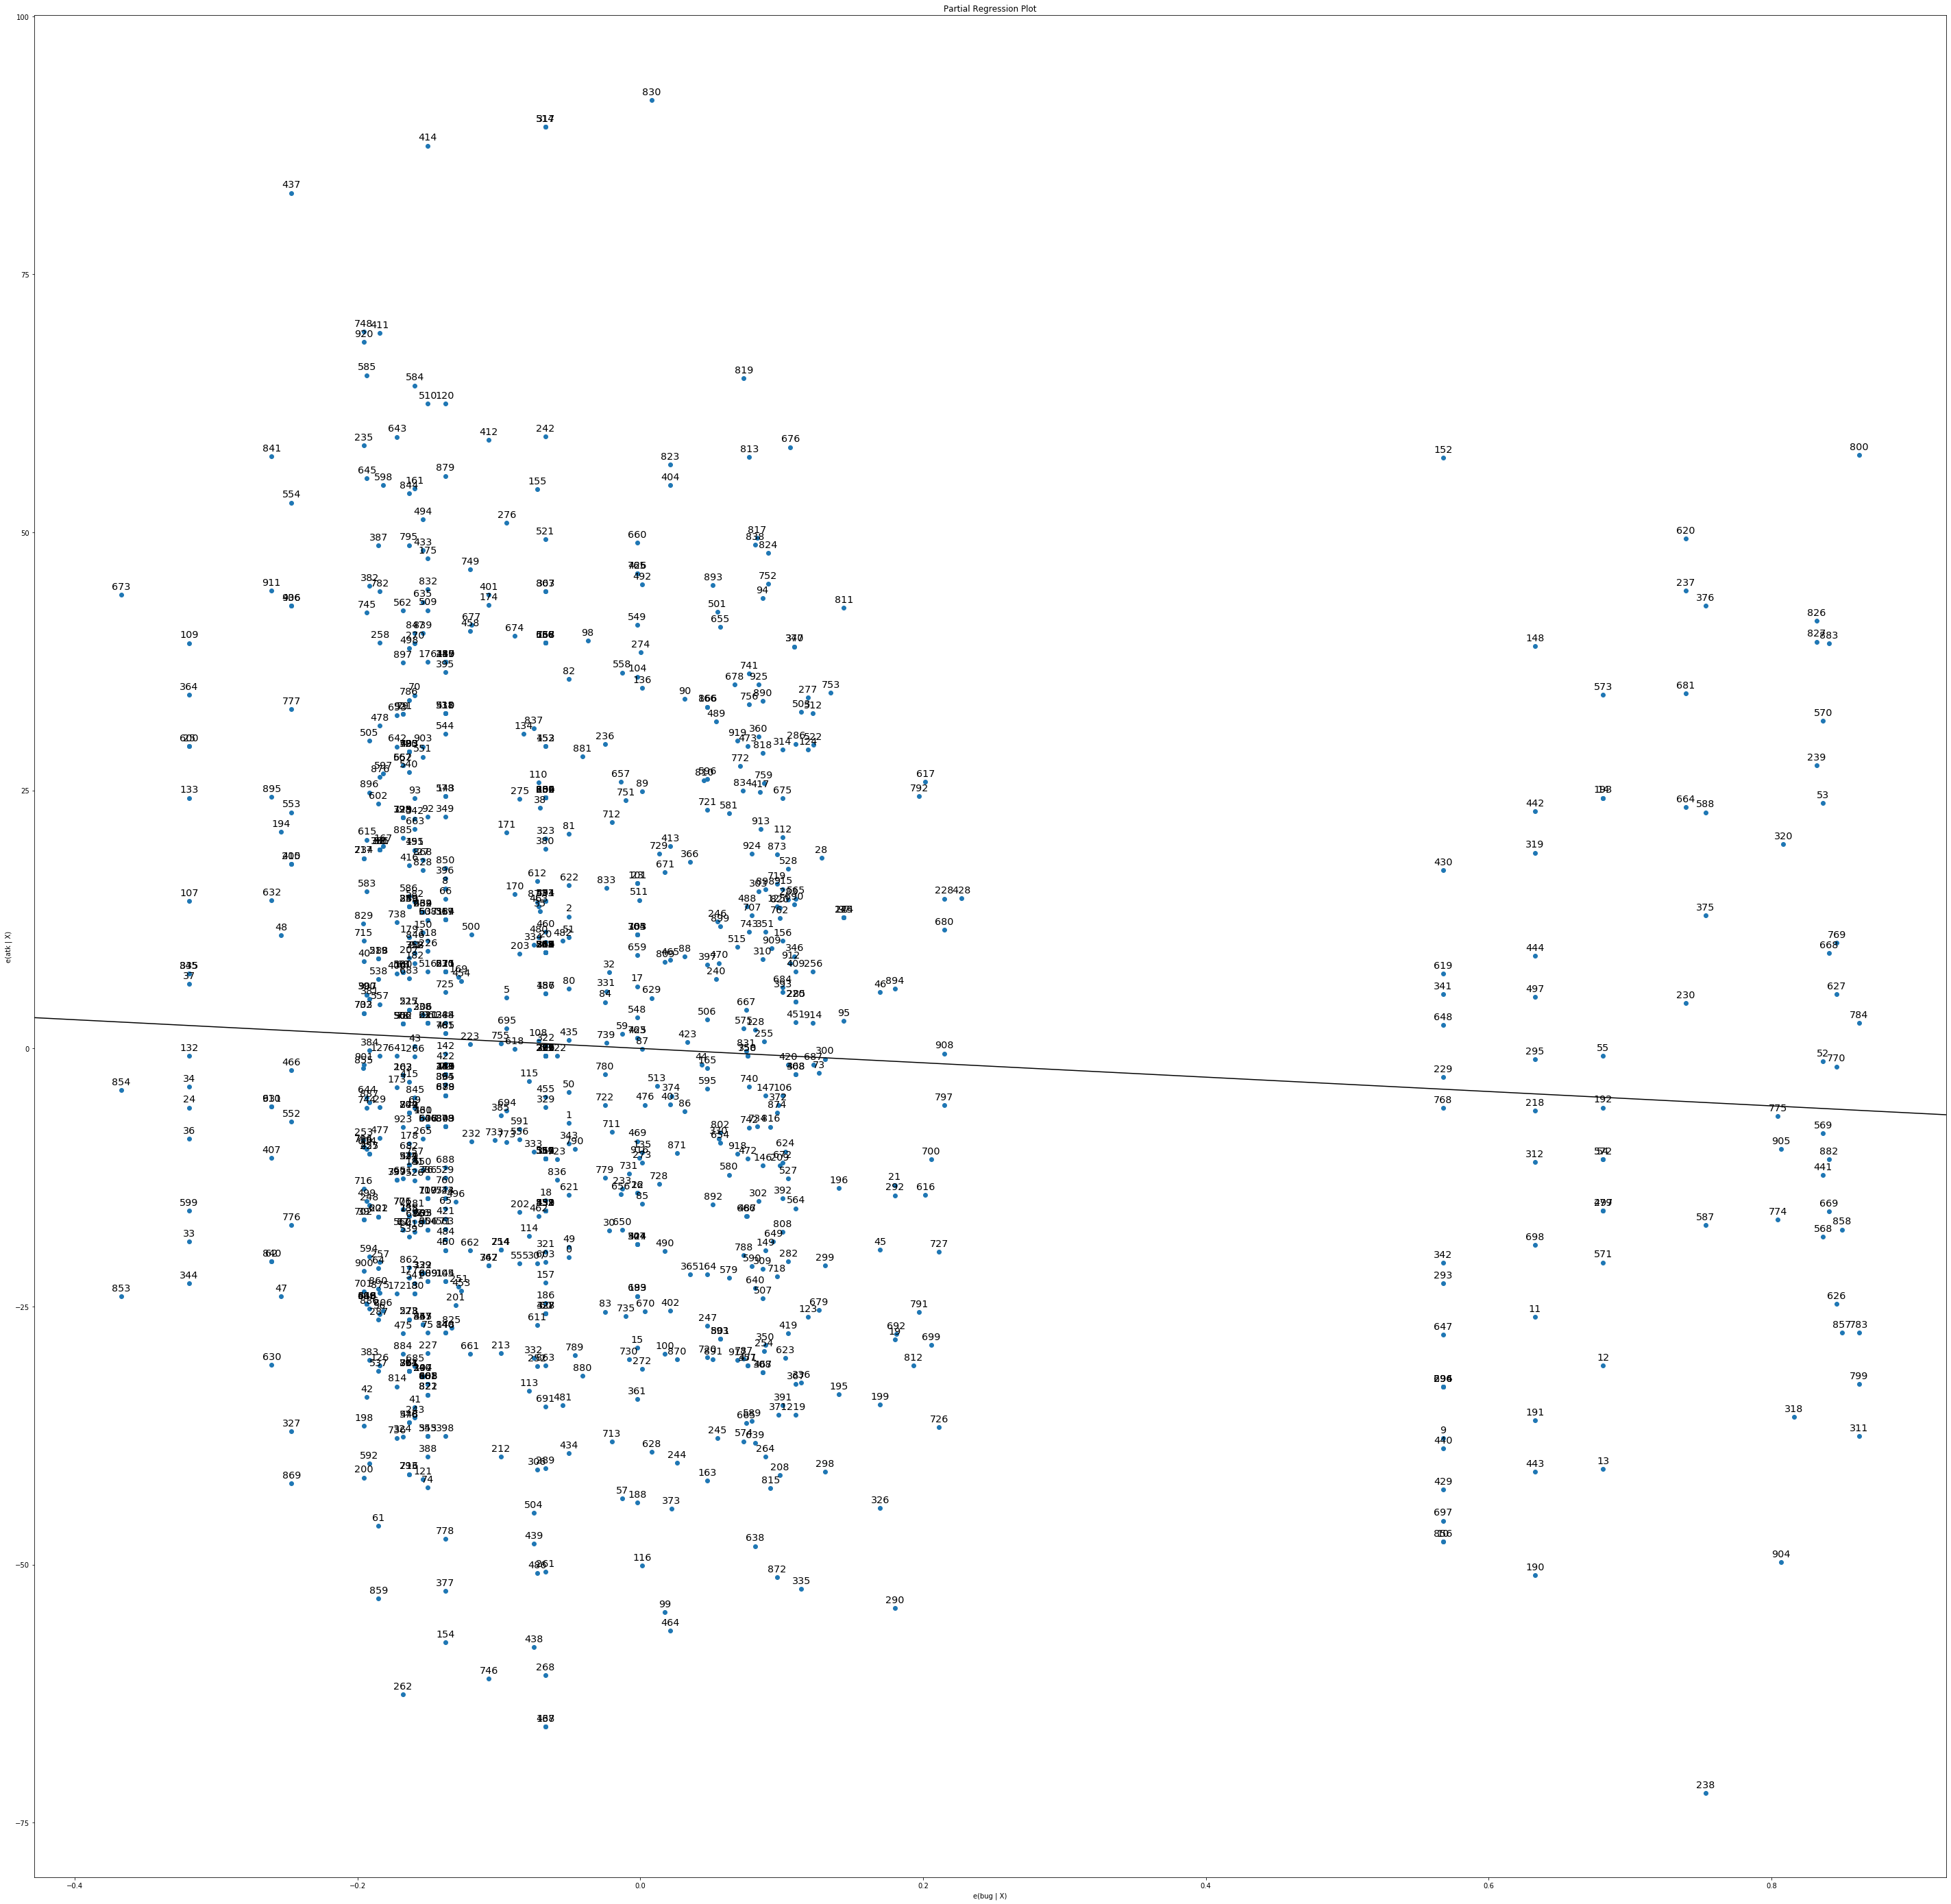

In [4]:
#Partial Regression for the Bug Type (Low Coefficient)
fig_bug = sm.graphics.plot_partregress('atk', 'bug', ["dragon", "dark", "dragon", "electric", "fairy", "fighting", "fire", "flying", "ghost", "grass", "ground", "ice", "normal", "poison", "psychic", "rock", "steel", "water"], data=dm1, obs_labels=True)
fig_bug.set_figheight(50)
fig_bug.set_figwidth(50)
genall.loc[[190, 904, 238, 152, 800, 620], ["pokemon","atk"]]

,pokemon,atk
813,Dhelmise,131
838,Blacephalon,127
824,Lunala,113
592,Yamask,30
638,Litwick,30


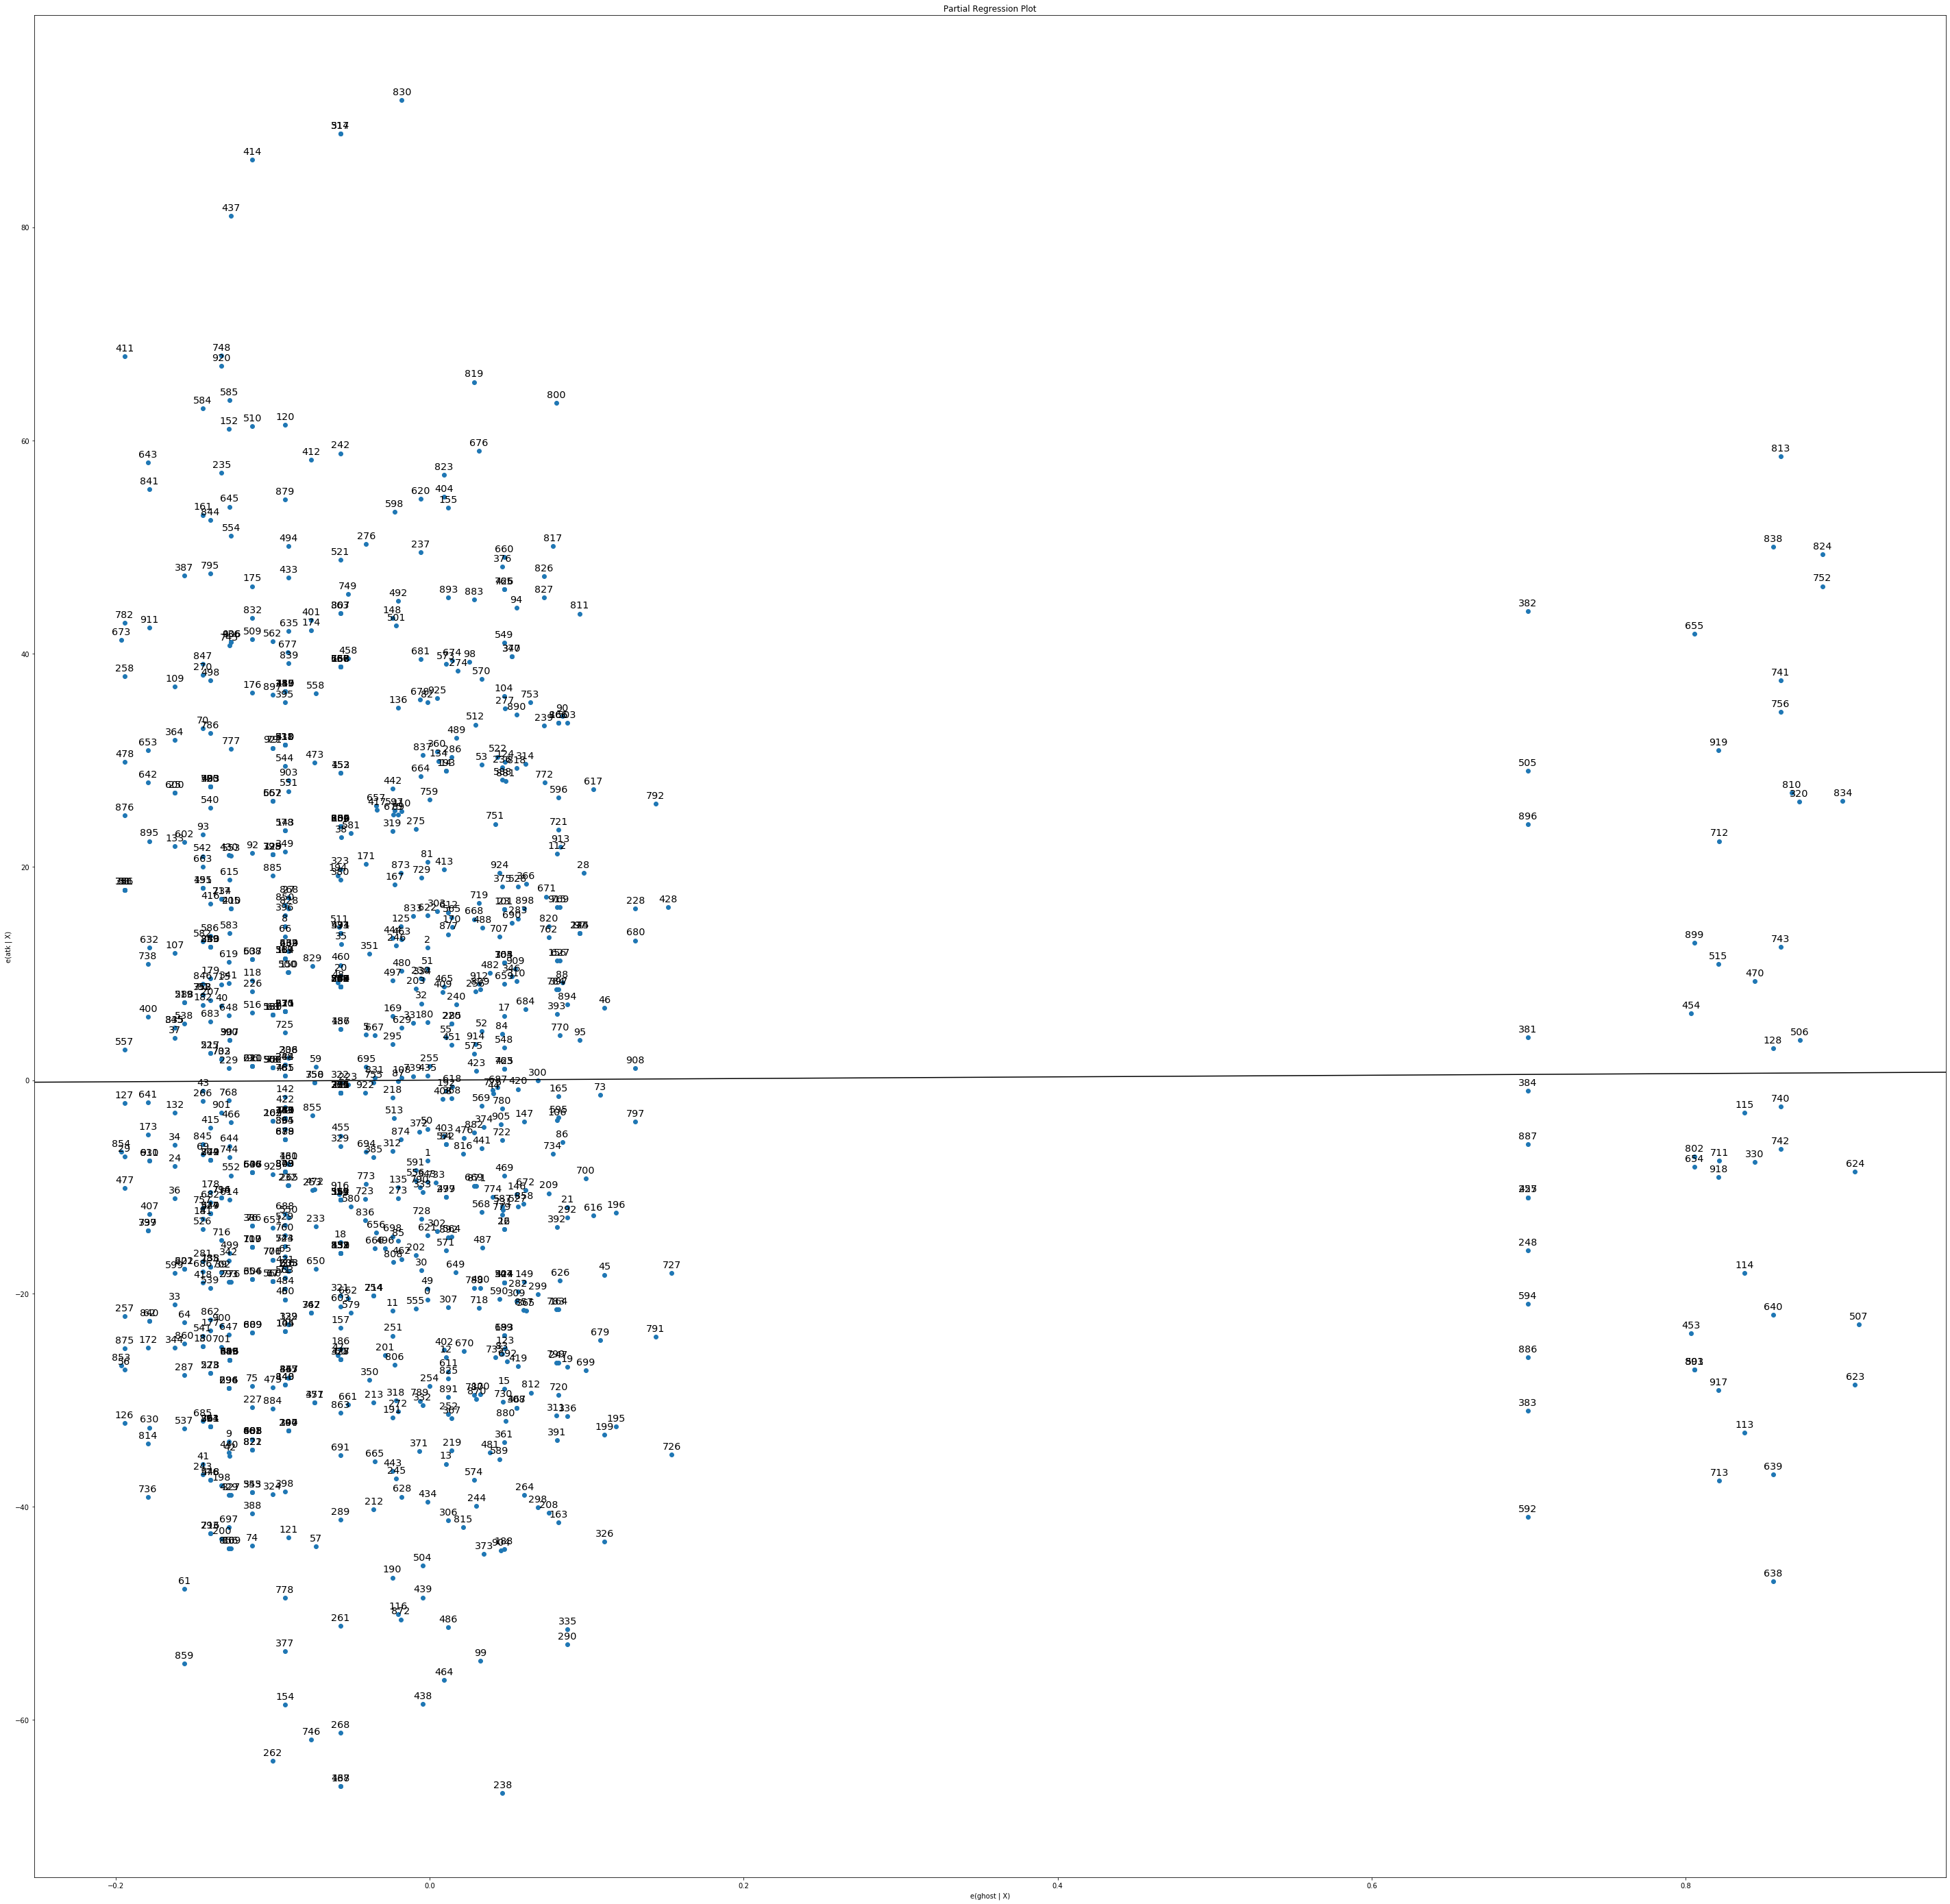

In [5]:
#Partial Regression for the Ghost Type (Midpoint Coefficient)
fig_ghost = sm.graphics.plot_partregress('atk', 'ghost', ["dragon", "dark", "dragon", "electric", "fairy", "fighting", "fire", "flying", "bug", "grass", "ground", "ice", "normal", "poison", "psychic", "rock", "steel", "water"], data=dm1, obs_labels=True)
fig_ghost.set_figheight(50)
fig_ghost.set_figwidth(50)
genall.loc[[813, 838, 824, 592, 638], ["pokemon","atk"]]

,pokemon,atk
830,Kartana,181
823,Solgaleo,137
404,Metagross,135
438,Shieldon,42
464,Bronzor,24
99,Magnemite,35


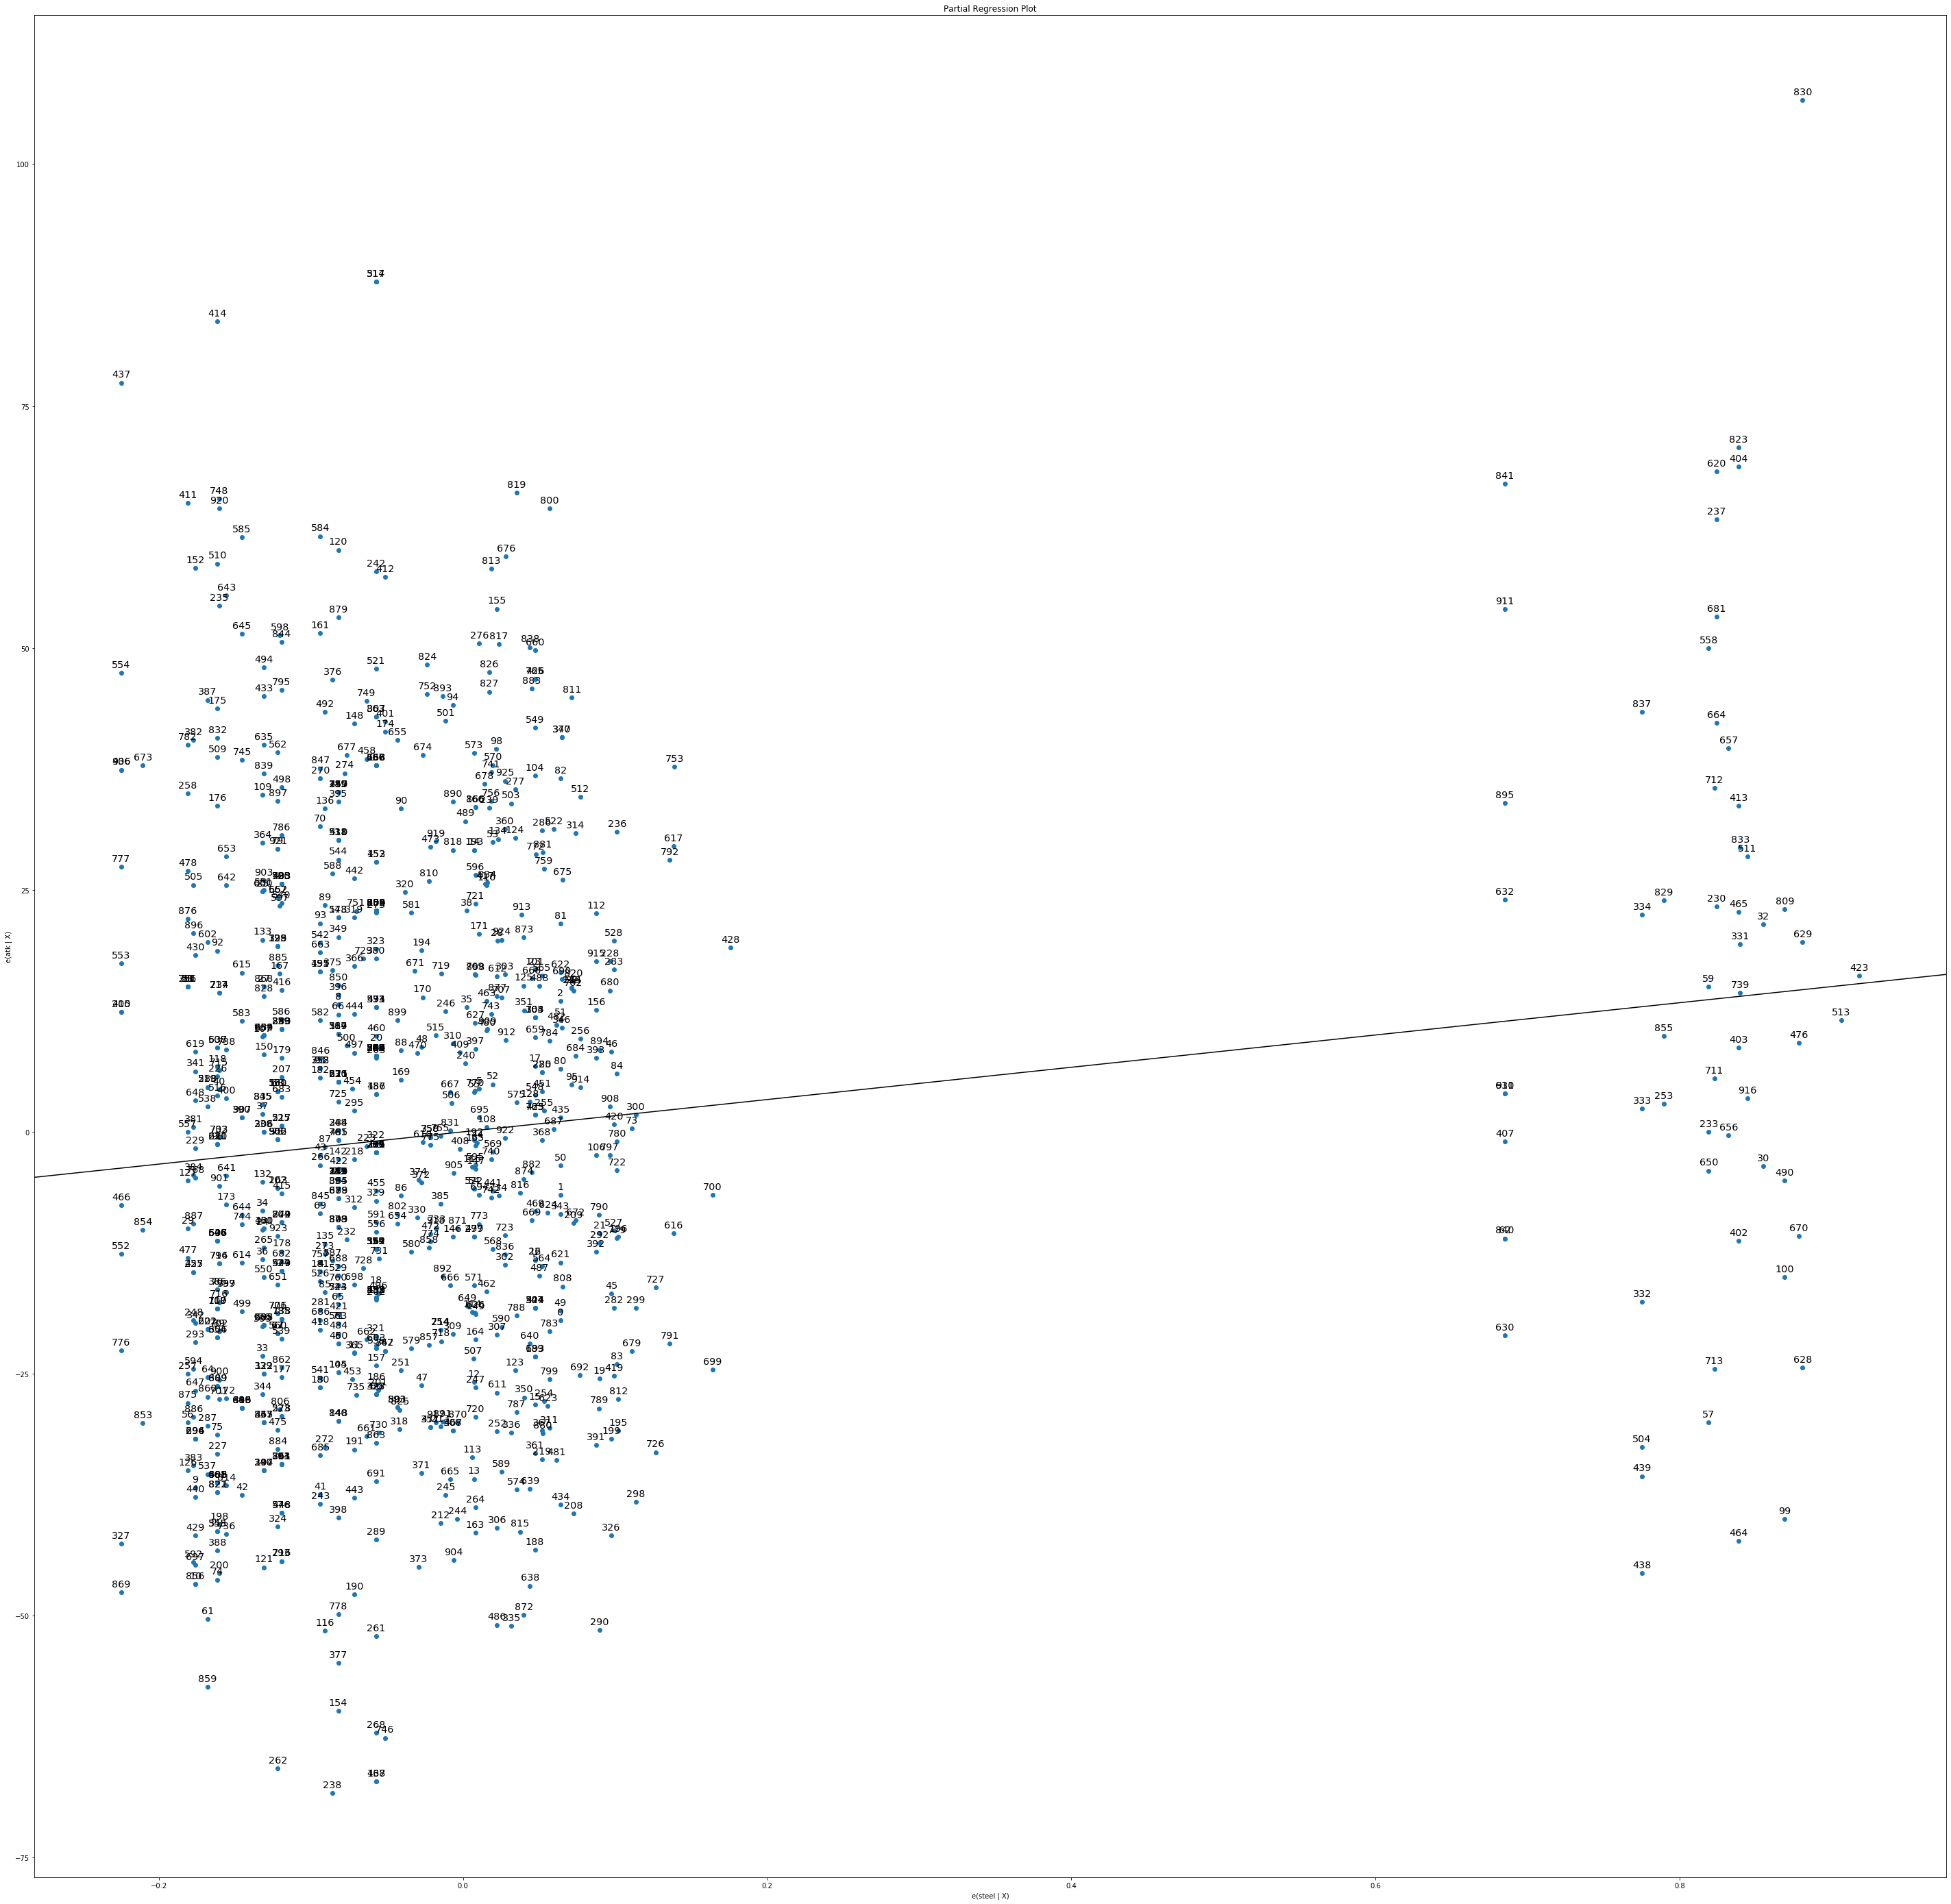

In [6]:
#Partial Regression for the Steel Type (High Coefficient)
fig_steel = sm.graphics.plot_partregress('atk', 'steel', ["dragon", "dark", "dragon", "electric", "fairy", "fighting", "fire", "flying", "bug", "grass", "ground", "ice", "normal", "poison", "psychic", "rock", "ghost", "water"], data=dm1, obs_labels=True)
fig_steel.set_figheight(50)
fig_steel.set_figwidth(50)
genall.loc[[830, 823, 404, 438, 464, 99], ["pokemon","atk"]]

Some of the conclusions of these graphs are the following:
1- It is clear that in regards to those types with high or low coefficients, the model is tyring to indicate that these types are specialized or non-specialized on this stat. For example, in the Partial Regression Plot for the Bug Type, a type with a low coefficient, we see that most data points are concentrated downwards. And even by looking at the top and bottom observations for this type, their values are considerably lower than those from the ghost type and the steel type. On the contrary, the opposite effects happen for the Steel Type, which has a high coefficient.
2- However, in the case of the Ghost Type, who is not significant and has a coeffcient very close to 0, we can deduce a possible reason for the low R2 value: while there are clearly types that are specialized on the Attack stat, there are types in which you can find a similar amount of pokemon with low and high Attack stat.

In conclusion, while it might not be recommended to use this model for predictions, the model actually uncovers something: the model shows which type are clearly geared towards certain stats.

In [7]:
#Now, we do the models for the other types.
stat_models = {}
for i in ['hp', 'atk', 'defe', 'spatk','spdef', 'spe', 'totalstats']:
    vari_att_typ = [i, 'Type:Bug', 'Type:Dark',
       'Type:Dragon', 'Type:Electric', 'Type:Fairy', 'Type:Fighting',
       'Type:Fire', 'Type:Flying', 'Type:Ghost', 'Type:Grass', 'Type:Ground',
       'Type:Ice', 'Type:Normal', 'Type:Poison', 'Type:Psychic', 'Type:Rock',
       'Type:Steel', 'Type:Water' ]
    data_model1 = genall[vari_att_typ]
    dm1 = data_model1.rename(columns = {'Type:Bug' :"bug", 'Type:Dark' : "dark",
       'Type:Dragon' : "dragon", 'Type:Electric' : "electric", 'Type:Fairy' : "fairy", 'Type:Fighting' : "fighting",
       'Type:Fire' : "fire", 'Type:Flying' : "flying", 'Type:Ghost' : "ghost", 'Type:Grass' : "grass", 'Type:Ground' : "ground",
       'Type:Ice' : "ice", 'Type:Normal' : "normal", 'Type:Poison' : "poison", 'Type:Psychic' : "psychic", 'Type:Rock' : "rock",
       'Type:Steel' : "steel", 'Type:Water' : "water" })
    ym1, xm1 = dmatrices("{} ~ bug + dark + dragon + electric + fairy + fighting + fire + flying + ghost + grass + ground + ice + normal + poison + psychic + rock + steel + water".format(i), data = dm1, return_type = "dataframe")
    model_at = sm.OLS(ym1, xm1)
    res_at = model_at.fit()
    stat_models[i] = res_at.summary()
for i in ['hp', 'atk', 'defe', 'spatk','spdef', 'spe', 'totalstats']:
    print(stat_models[i])    

                            OLS Regression Results                            
Dep. Variable:                     hp   R-squared:                       0.065
Model:                            OLS   Adj. R-squared:                  0.046
Method:                 Least Squares   F-statistic:                     3.483
Date:                Tue, 20 Oct 2020   Prob (F-statistic):           1.33e-06
Time:                        17:06:54   Log-Likelihood:                -4292.4
No. Observations:                 926   AIC:                             8623.
Df Residuals:                     907   BIC:                             8715.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     60.9883      2.842     21.457      0.0

List of Types Specialized and Non-Specialized for each Stat:
HP:
    Specialized: Dragon, Fighting, Ice, Normal, Psychic, Water, Ground
    Non-Specialized: Bug
ATK:
    Specialized: Fighting, Dragon, Dark, Ground, Rock, Steel
    Non-Specialized: Psychic, Fairy, Bug
DEF:
    Specialized: Dragon, Fighting, Ghost, Grass, Ground, Rock, Steel, Water
    Non-Specialized: NA
SPATK:
    Specialized: Dragon, Electric, Fairy, Fire, Flying, Ghost, Grass, Ice, Poison, Psychic, Water
    Non-Specialized: Bug, Ground
SPDEF:
    Specialized: Dragon, Fairy, Ghost, Ice, Psychic, Rock, Steel, Water
    Non-Specialized: NA
SPE:
    Specialized: Dark, Dragon, Electric, Fighting, Fire, Flying, Psychic
    Non-Specialized: Rock
AS A WHOLE:
    TYPES WITH MORE STATS: Dragon, Fighting, Psychic, Steel, Ice
    TYPES WITH LESS STATS: Bug, Normal?, Poison? 
Final Thoughts:
1- Dragon Types are consistently strong in all categories.
2- The types who have more stats are those who have historically appeared in later parts of the games.
3- The only type who doesn't have a clear specialization is the Bug Type. Furthermore, the Bug Type only appears as Non-specialized
4- When it comes to defensive stats, there is only one case in which a type is clearly weak in these areas (the Bug Type in HP). This could signal that pokemon stats are generally designed so that their defensive options are never truly vulnerable.
5- Some other types that might need some love in terms of stats are the Poison and the Normal Types. While it is not clear that they are as weak as the Bug Type, they only appear as specialized in one category, and there are better options in each of them.

In [8]:
#Making models for the regions
stat_models_reg = {}
for i in ['hp', 'atk', 'defe', 'spatk','spdef', 'spe', 'totalstats']:
    vari_att_typ = [i, 'region']
    data_model1 = genall[vari_att_typ] 
    ym1, xm1 = dmatrices("{} ~ region".format(i), data = data_model1, return_type = "dataframe")
    model_at = sm.OLS(ym1, xm1)
    res_at = model_at.fit()
    stat_models_reg[i] = res_at.summary()
for i in ['hp', 'atk', 'defe', 'spatk','spdef', 'spe', 'totalstats']:
    print(stat_models_reg[i])

                            OLS Regression Results                            
Dep. Variable:                     hp   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     1.571
Date:                Tue, 20 Oct 2020   Prob (F-statistic):              0.140
Time:                        17:37:13   Log-Likelihood:                -4317.8
No. Observations:                 926   AIC:                             8652.
Df Residuals:                     918   BIC:                             8690.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           69.0094      2.501  

Unlike the model for Stat-Types, the models for the region have low R2 and non-significant f-tests. In this case, it is not recommended to draw any conclusions from these models.